# Assignment 5, Question 4: Data Exploration

**Points: 15**

In this notebook, you'll explore the clinical trial dataset using pandas selection and filtering techniques.

You'll use utility functions from `q3_data_utils` where helpful, but also demonstrate direct pandas operations.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, filter_data, clean_data

# Load the data
df = clean_data(load_data('data/clinical_trial_raw.csv'))
print(f"Loaded {len(df)} patients with {len(df.columns)} variables")

# Prewritten visualization functions for exploration
def plot_value_counts(series, title, figsize=(10, 6)):
    """
    Create a bar chart of value counts.
    
    Args:
        series: pandas Series with value counts
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    series.plot(kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_crosstab(crosstab_data, title, figsize=(10, 6)):
    """
    Create a heatmap of crosstab data.
    
    Args:
        crosstab_data: pandas DataFrame from pd.crosstab()
        title: Chart title
        figsize: Figure size tuple
    """
    plt.figure(figsize=figsize)
    plt.imshow(crosstab_data.values, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xticks(range(len(crosstab_data.columns)), crosstab_data.columns, rotation=45)
    plt.yticks(range(len(crosstab_data.index)), crosstab_data.index)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients with 18 variables


## Part 1: Basic Exploration (3 points)

Display:
1. Dataset shape
2. Column names and types
3. First 10 rows
4. Summary statistics (.describe())

In [2]:
# TODO: Display dataset info
display(df.shape)
display(df.columns, df.dtypes)
display(df.head(n=10))
display(df.describe())

(10000, 18)

Index(['patient_id', 'age', 'sex', 'bmi', 'enrollment_date', 'systolic_bp',
       'diastolic_bp', 'cholesterol_total', 'cholesterol_hdl',
       'cholesterol_ldl', 'glucose_fasting', 'site', 'intervention_group',
       'follow_up_months', 'adverse_events', 'outcome_cvd', 'adherence_pct',
       'dropout'],
      dtype='object')

patient_id             object
age                   float64
sex                    object
bmi                   float64
enrollment_date        object
systolic_bp           float64
diastolic_bp          float64
cholesterol_total     float64
cholesterol_hdl       float64
cholesterol_ldl       float64
glucose_fasting       float64
site                   object
intervention_group     object
follow_up_months        int64
adverse_events          int64
outcome_cvd            object
adherence_pct         float64
dropout                object
dtype: object

,patient_id,age,sex,bmi,enrollment_date,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,site,intervention_group,follow_up_months,adverse_events,outcome_cvd,adherence_pct,dropout
0,p00001,80.0,f,29.3,2022-05-01,123.0,80.0,120.0,55.0,41.0,118.0,site b,control,20,0,no,24.0,no
1,p00002,80.0,female,NaN,2022-01-06,139.0,81.0,206.0,58.0,107.0,79.0,site a,control,24,0,no,77.0,no
2,p00003,82.0,female,-1.0,2023-11-04,123.0,86.0,172.0,56.0,82.0,77.0,site c,treatment b,2,0,yes,70.0,no
3,p00004,95.0,female,25.4,2022-08-15,116.0,77.0,200.0,56.0,104.0,115.0,site d,treatment b,17,0,no,62.0,no
4,p00005,95.0,m,NaN,2023-04-17,97.0,71.0,185.0,78.0,75.0,113.0,site e,treatmen a,9,0,yes,NaN,yes
5,p00006,78.0,f,26.8,2023-08-29,116.0,66.0,164.0,54.0,99.0,99.0,site a,treatmenta,4,0,yes,NaN,yes
6,p00007,84.0,f,25.4,2022-05-12,133.0,100.0,215.0,62.0,113.0,70.0,site a,treatment a,20,1,no,76.0,no
7,p00008,70.0,male,24.7,2022-06-04,111.0,72.0,174.0,60.0,94.0,109.0,site b,treatment a,19,0,no,53.0,no
8,p00009,92.0,female,26.9,2022-04-06,NaN,NaN,189.0,62.0,89.0,103.0,site a,control,21,0,yes,53.0,no
9,p00010,75.0,male,21.1,2023-12-14,128.0,76.0,218.0,77.0,97.0,96.0,site a,treatment b,1,0,no,50.0,no


,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
count,9800.000000,9562.000000,9586.000000,9586.000000,9446.000000,9446.000000,9446.000000,9631.000000,10000.00000,10000.000000,8533.000000
mean,80.778265,25.730558,117.531087,73.550908,178.039488,61.369786,85.698603,96.424255,12.25460,0.145500,60.615610
std,13.544449,5.339547,13.973973,10.167464,33.129034,11.062101,28.686463,17.112961,7.07675,0.393631,18.974399
min,43.000000,-1.000000,75.000000,60.000000,91.000000,25.000000,40.000000,51.000000,0.00000,0.000000,20.000000
25%,70.000000,23.500000,108.000000,65.000000,155.000000,54.000000,65.000000,84.000000,6.00000,0.000000,47.000000
50%,81.000000,26.000000,117.000000,73.000000,177.000000,61.000000,84.000000,96.000000,12.00000,0.000000,62.000000
75%,92.000000,28.775000,127.000000,81.000000,200.000000,69.000000,105.000000,108.000000,19.00000,0.000000,75.000000
max,100.000000,42.800000,173.000000,118.000000,315.000000,98.000000,226.000000,163.000000,24.00000,4.000000,100.000000


## Part 2: Column Selection (3 points)

Demonstrate different selection methods:

1. Select only numeric columns using `.select_dtypes()`
2. Select specific columns by name
3. Select a subset of rows and columns using `.loc[]`

In [3]:
# TODO: Select numeric columns
df.select_dtypes(include=['number'])


,age,bmi,systolic_bp,diastolic_bp,cholesterol_total,cholesterol_hdl,cholesterol_ldl,glucose_fasting,follow_up_months,adverse_events,adherence_pct
0,80.0,29.3,123.0,80.0,120.0,55.0,41.0,118.0,20,0,24.0
1,80.0,NaN,139.0,81.0,206.0,58.0,107.0,79.0,24,0,77.0
2,82.0,-1.0,123.0,86.0,172.0,56.0,82.0,77.0,2,0,70.0
3,95.0,25.4,116.0,77.0,200.0,56.0,104.0,115.0,17,0,62.0
4,95.0,NaN,97.0,71.0,185.0,78.0,75.0,113.0,9,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,72.0,23.2,122.0,73.0,182.0,54.0,92.0,97.0,21,0,20.0
9996,100.0,28.9,124.0,78.0,157.0,56.0,70.0,102.0,11,0,57.0
9997,78.0,23.8,110.0,63.0,154.0,69.0,71.0,114.0,2,1,77.0
9998,86.0,27.0,139.0,98.0,196.0,38.0,119.0,126.0,16,0,63.0


In [4]:
# TODO: Select specific columns
specific_data = df['bmi']

In [5]:
# TODO: Use .loc[] to select subset
subset = df.loc[15:35, 'bmi']
display(subset)

15    30.0
16    29.6
17    23.2
18    24.6
19    24.0
20    28.9
21    24.9
22    33.3
23    24.9
24    23.6
25    22.9
26    24.3
27    27.8
28    24.6
29    28.5
30    28.1
31    23.4
32    22.3
33    37.1
34    34.4
35    28.2
Name: bmi, dtype: float64

## Part 3: Filtering (4 points)

Filter the data to answer these questions:

1. How many patients are over 65 years old?
2. How many patients have systolic BP > 140?
3. Find patients who are both over 65 AND have systolic BP > 140
4. Find patients from Site A or Site B using `.isin()`

In [6]:
# TODO: Filter and count patients over 65
# 1. Use the filter_data utility from Q3
# 2. Create a filter for age > 65
# 3. Apply the filter and count the results
filters = [
        {'column': 'age', 'condition': 'greater_than', 'value': 65},
    ]
patients_over_65 = filter_data(df, filters)
print(f"Patients over 65: {len(patients_over_65['age'])}")


Patients over 65: 8326


In [7]:
# TODO: Filter for high BP
# 1. Use the filter_data utility from Q3
# 2. Create a filter for systolic_bp > 140
# 3. Apply the filter and count the results
filters = [
        {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140},
    ]
high_bp = filter_data(df, filters)
print(f"Patients with high BP: {len(high_bp)}")


Patients with high BP: 538


In [8]:
# TODO: Multiple conditions with &
# 1. Use filter_data for multiple conditions:
# 2. Create filters for both conditions:
#     {'column': 'age', 'condition': 'greater_than', 'value': 65},
#     {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}
# ]
filters = [{'column': 'age', 'condition': 'greater_than', 'value': 65},
    {'column': 'systolic_bp', 'condition': 'greater_than', 'value': 140}]
# 3. Apply the filter and count the results
both_conditions = filter_data(df, filters)
print(f"Patients over 65 AND high BP: {len(both_conditions)}")
#
# 5. Alternative: Use in_range for age range:
# 5. Create filter for age range 65-100
# 6. Apply the filter and count the results



Patients over 65 AND high BP: 464


In [9]:
# TODO: Filter by site using .isin()
# 1. Use the filter_data utility from Q3
# 2. Create a filter for Site A or Site B
# 3. Apply the filter and count the results
filters = [ {'column': 'site', 'condition': 'in_list', 'value': ['Site A', 'Site B']}]
site_ab = filter_data(df, filters)
print(f"Patients from Site A or B: {len(site_ab)}")


Patients from Site A or B: 0


## Part 4: Value Counts and Grouping (5 points)

1. Get value counts for the 'site' column
2. Get value counts for the 'intervention_group' column  
3. Create a crosstab of site vs intervention_group
4. Calculate mean age by site
5. Save the site value counts to `output/q4_site_counts.csv`

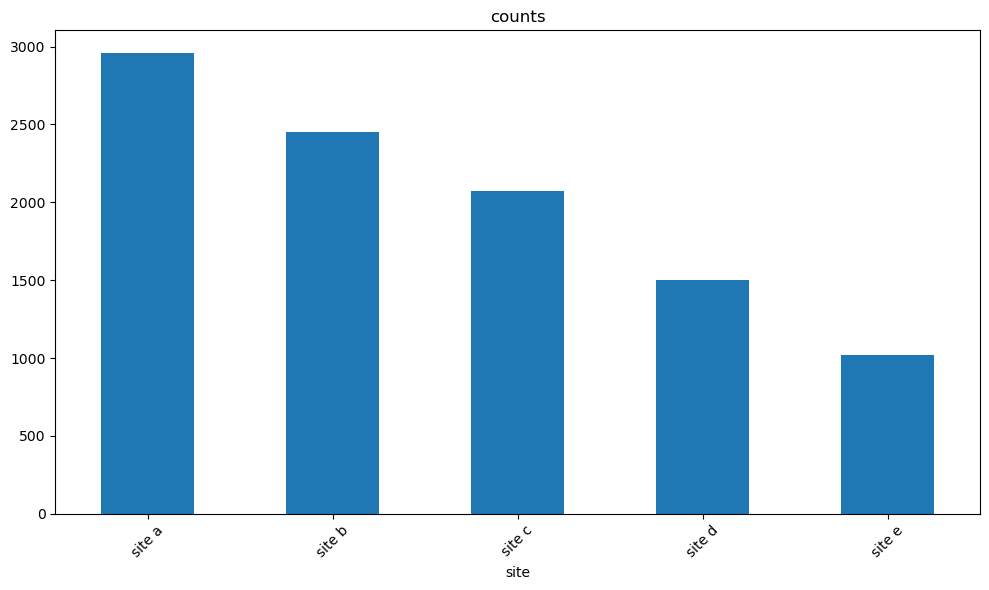

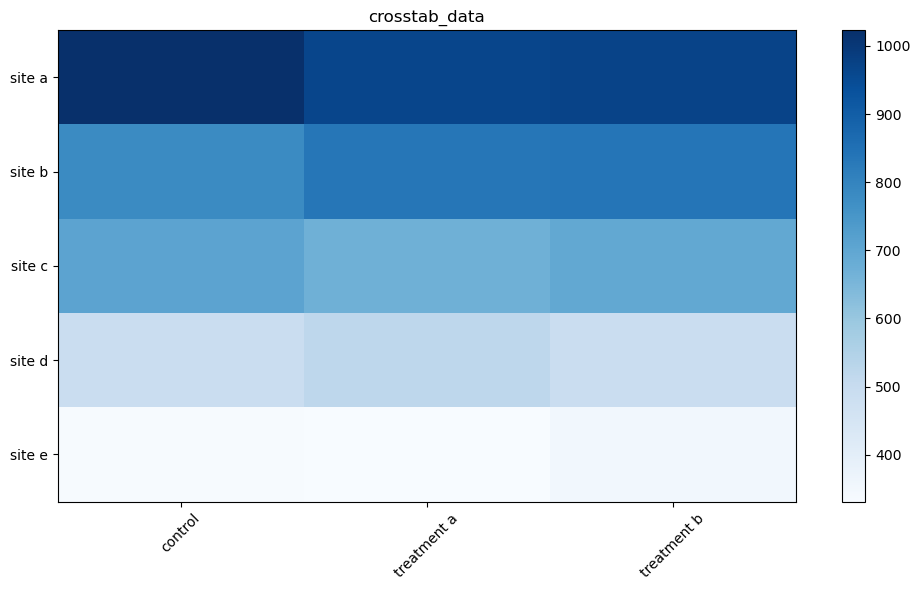

site
site a    81.213296
site b    80.444030
site c    80.750986
site d    80.755586
site e    80.415075
Name: age, dtype: float64

In [14]:
# TODO: Value counts and analysis
df['intervention_group'] = df['intervention_group'].str.replace('contrl', 'control')
df['intervention_group'] = df['intervention_group'].str.replace('treatmen a', 'treatment a')
df['intervention_group'] = df['intervention_group'].str.replace('treatmenta', 'treatment a')
site_counts = df['site'].value_counts()
plot_value_counts(site_counts, "counts")
intervention_group_count = df['intervention_group'].value_counts()
site_vs_intervention = pd.crosstab(df['site'],df['intervention_group'])
plot_crosstab(site_vs_intervention, "crosstab_data")
mean_age = df.groupby('site')['age'].mean()
display(mean_age)

In [11]:
# TODO: Save output
site_counts.to_csv('output/q4_site_counts.csv')


## Summary

Write 2-3 sentences about what you learned from exploring this dataset.

**Your summary here:**

TODO: Write your observations

There are lots of duplicates for the sites and most of the pateints with high systopic blood pressure are over 65. 

